In [1]:
%matplotlib notebook

In [2]:
import matplotlib.ticker

In [3]:
frame = pd.read_csv("sampling-frame.tsv", sep = "\t")
frame.head()

,user,home_proj,global_edits,proj_group,proj_domain
0,! Bikkit !,dewiki,219.0,dewiki,de.wikipedia.org
1,!NewLondon31,jawiki,46.0,jawiki,ja.wikipedia.org
2,!Silent,ptwiki,20688.8,ptwiki,pt.wikipedia.org
3,"""Colorado Campeão""!",ptwiki,417.0,ptwiki,pt.wikipedia.org
4,"""quasi"" tuttologo",itwiki,117.0,itwiki,it.wikipedia.org


# Frame stratification

In [4]:
pd.DataFrame(frame["proj_group"].value_counts())

,proj_group
enwiki,18004
dewiki,3825
cee_wps,3544
jawiki,3151
frwiki,3058
commons,2599
eswiki,2426
ruwiki,2312
other,1900
zhwiki,1876


In [5]:
# Round the highest edit count up to the nearest hundred thousand,
# in order to make a pretty edge for the top bin
top_edge = int(np.ceil(frame["global_edits"].max() / 100000) * 100000)

# See readme for why we picked these bins
edit_bins = [10, 30, 150, 600, 1200, 3500, top_edge]

frame["binned_edits"] = pd.cut(frame["global_edits"], edit_bins, right=False)

In [6]:
frame["binned_edits"].value_counts(sort = False)

[10, 30)            2792
[30, 150)          14299
[150, 600)         14578
[600, 1200)         6038
[1200, 3500)        7325
[3500, 1100000)     7197
Name: binned_edits, dtype: int64

In [7]:
frame.groupby(["proj_group", "binned_edits"]).size().unstack()

binned_edits,"[10, 30)","[30, 150)","[150, 600)","[600, 1200)","[1200, 3500)","[3500, 1100000)"
proj_group,,,,,,
arwiki,26,94,96,56,68,72
asia_wps,94,452,498,245,296,268
cee_wps,170,830,946,417,594,587
commons,57,304,481,294,508,955
dewiki,141,982,1094,482,619,507
enwiki,1104,5682,5318,1952,2141,1807
eswiki,166,681,703,294,323,259
frwiki,175,810,823,370,449,431
itwiki,88,549,487,215,216,211


# Distribution of yearly edit counts

<IPython.core.display.Javascript object>


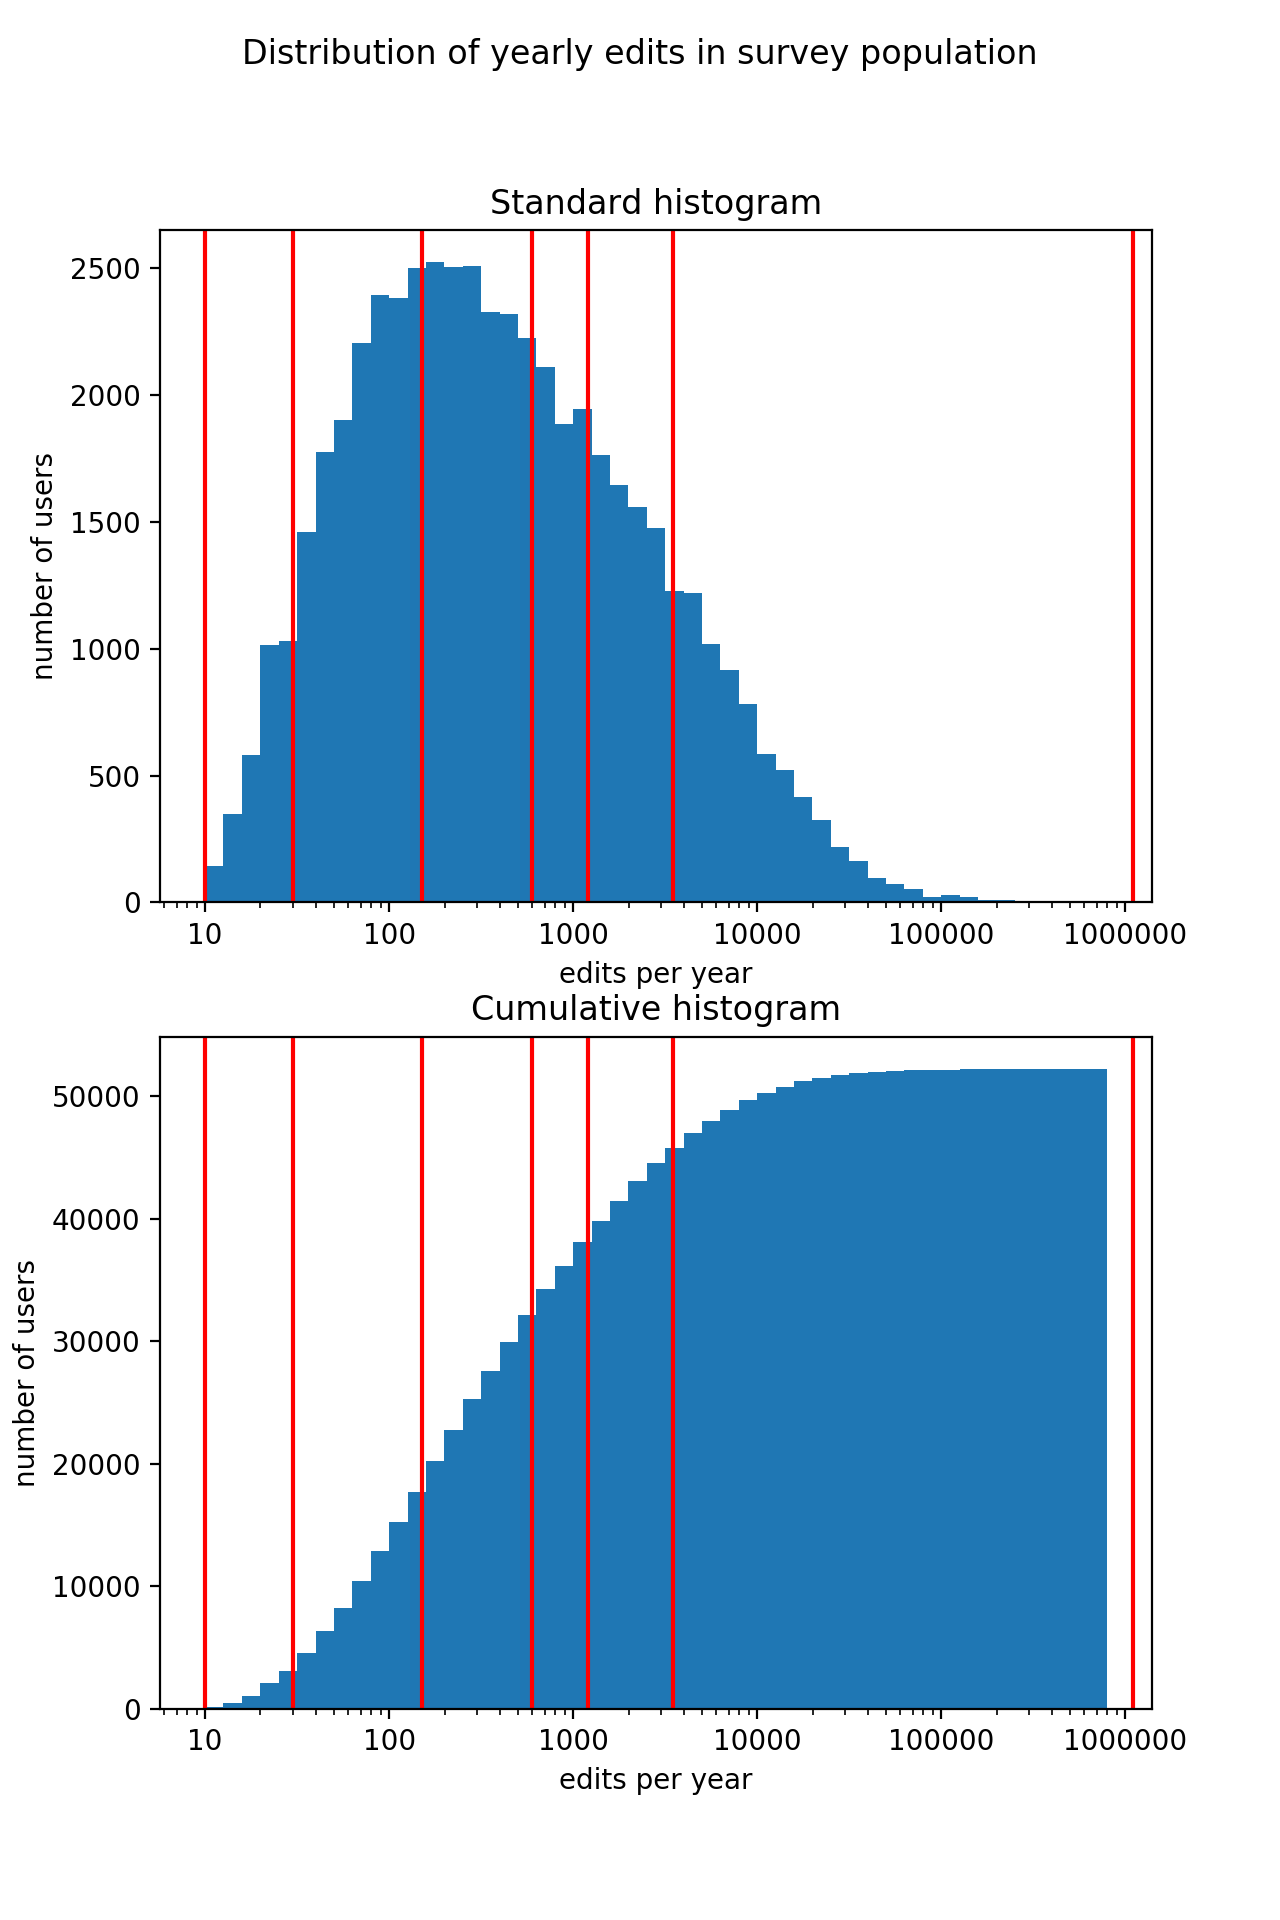

In [15]:
fig_size = plt.rcParams["figure.figsize"]

fig, (ax1, ax2) = plt.subplots(
    # 2 rows, 1 column
    2, 1,
    # Make the figure double height
    figsize = (fig_size[0], fig_size[1] * 2),
)

fig.suptitle("Distribution of yearly edits in survey population")

def set_common(ax, cumulative = False):
    ax.hist(
        frame["global_edits"],
        bins = 10**np.arange(1, 6, 0.1),
        cumulative = cumulative
    )
    
    ax.set_xscale("log", basex = 10)
    ax.xaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter("%d"))
    
    
    ax.set_ylabel("number of users")
    ax.set_xlabel("edits per year")

    for edge in edit_bins:
        ax.axvline(x = edge, color = "red")

set_common(ax1)
set_common(ax2, True)
ax1.set_title("Standard histogram")
ax2.set_title("Cumulative histogram")

plt.show()